In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

sns.set(context="paper", style="whitegrid", 
       rc={
           "figure.figsize": (21, 9),
           "figure.dpi": 100
       })
google = ["#4285F4", "#DB4437", "#F4B400", "#0F9D58"]
sns.set_palette(google)

In [2]:
df = pd.read_csv("./data/raw_appliances/main_1.csv")
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

df.index = df["TIMESTAMP"]

In [3]:
df.head()

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_type,appliances_id,appliances_name
TIMESTAMP,,,,,,,,
2012-04-01 00:00:00,2012-04-01 00:00:00,0.93,141.0,918.0,1066.0,main,1,main 1
2012-04-01 00:01:00,2012-04-01 00:01:00,0.93,141.0,913.0,1056.0,main,1,main 1
2012-04-01 00:02:00,2012-04-01 00:02:00,0.93,139.0,872.0,1021.0,main,1,main 1
2012-04-01 00:03:00,2012-04-01 00:03:00,0.93,141.0,872.0,1018.0,main,1,main 1
2012-04-01 00:04:00,2012-04-01 00:04:00,0.89,140.0,772.0,1018.0,main,1,main 1


In [4]:
resample_min = 10
df2 = df.resample(f"{resample_min}min").mean()
df2 = df2.reset_index()

In [5]:
df2

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_id
0,2012-04-01 00:00:00,0.923,160.8,949.9,1132.4,1
1,2012-04-01 00:10:00,0.959,401.1,2261.1,2449.3,1
2,2012-04-01 00:20:00,0.973,433.8,2631.2,2896.1,1
3,2012-04-01 00:30:00,0.948,365.6,2112.1,2383.6,1
4,2012-04-01 00:40:00,0.924,165.9,1047.4,1205.9,1
...,...,...,...,...,...,...
105115,2014-03-31 23:10:00,0.839,160.4,536.9,767.3,1
105116,2014-03-31 23:20:00,0.837,109.0,530.7,738.9,1
105117,2014-03-31 23:30:00,0.900,162.2,711.0,863.9,1
105118,2014-03-31 23:40:00,0.770,106.4,428.5,621.1,1


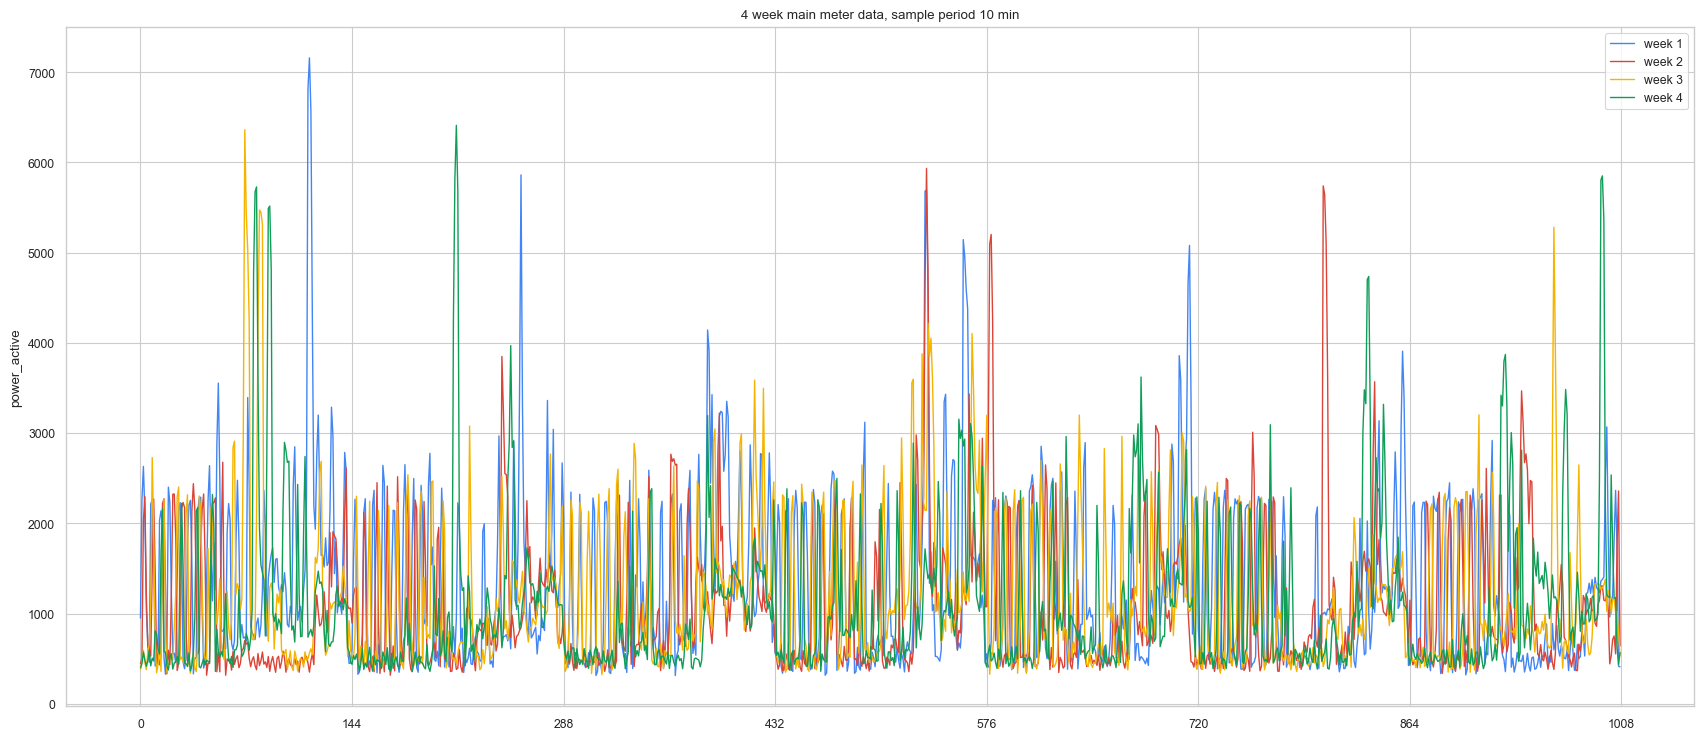

In [6]:
# number of sample per one day
oneday_n = int(24*60/resample_min)
# number of sample per week
oneweek_n = int(oneday_n * 7)

# time axis for one week
x = np.arange(0, oneweek_n)

n_week = 4
# plot one week data
for i in range(n_week):
    sns.lineplot(x, df2['power_active'][oneweek_n*i:oneweek_n*(i+1)], lw=1, label=f"week {i+1}")

# config x tick for every day
plt.xticks(np.arange(0, oneweek_n+oneday_n, oneday_n))

plt.title(f"{n_week} week main meter data, sample period {resample_min} min")
plt.show()

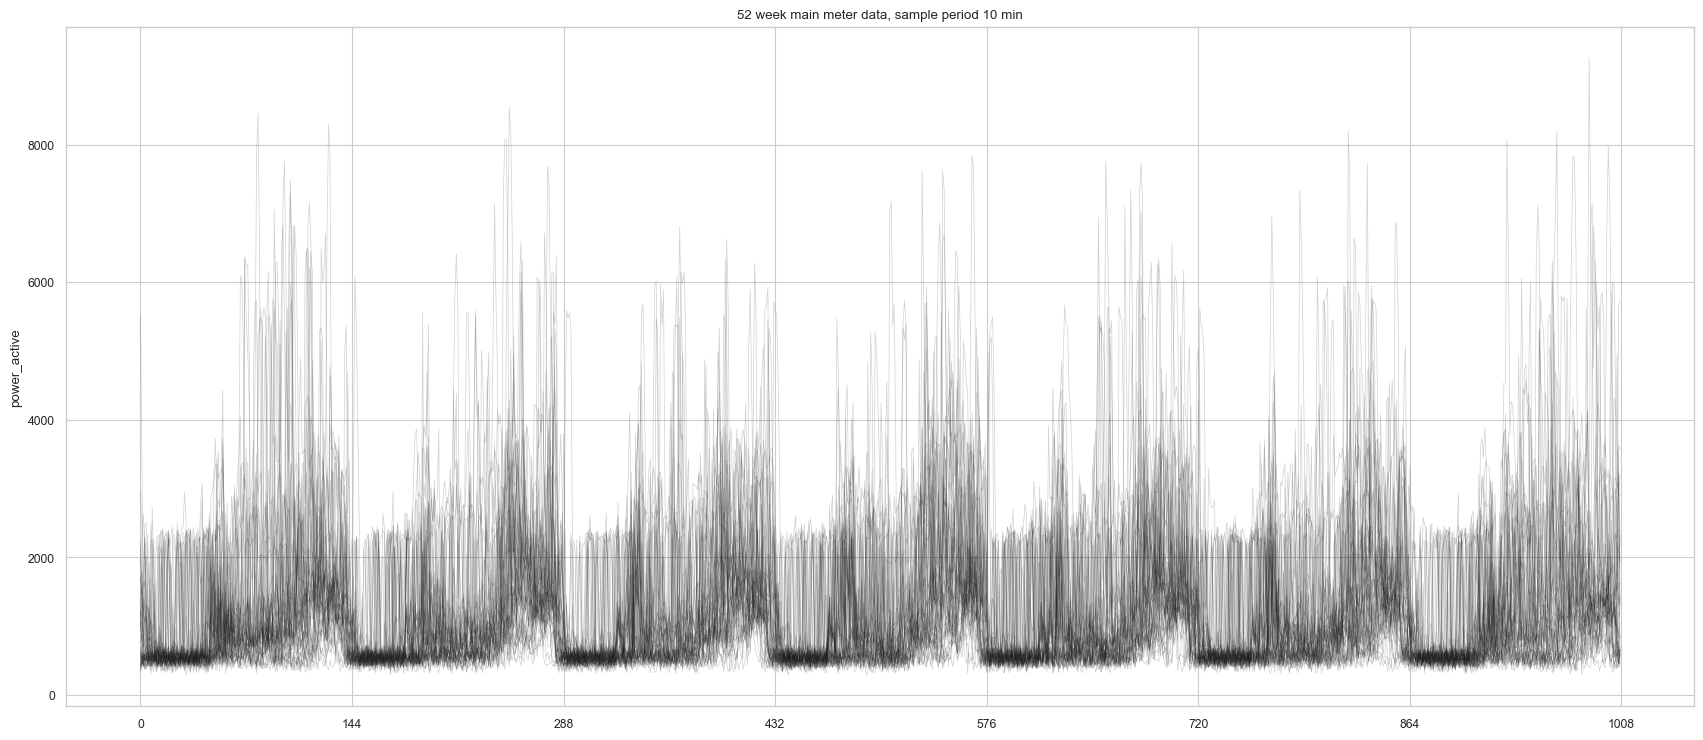

In [7]:
# number of sample per one day
oneday_n = int(24*60/resample_min)
# number of sample per week
oneweek_n = int(oneday_n * 7)

# time axis for one week
x = np.arange(0, oneweek_n)

n_week = 52
# plot one week data
for i in range(n_week):
    sns.lineplot(x, df2['power_active'][oneweek_n*i:oneweek_n*(i+1)], lw=0.5, alpha=0.2, color='k')

# config x tick for every day
plt.xticks(np.arange(0, oneweek_n+oneday_n, oneday_n))

plt.title(f"{n_week} week main meter data, sample period {resample_min} min")
plt.show()